In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('FinalList.csv')
df

,ID,Fuel,Class,Sub-Class,Group,BP2,Uncertainty,Source,SMILES,Molecular Formula,...,HeteroA,AromaticR,CPS,GATS2m,FPSA3,WNSA3,PNSA3,ATS3p,RPCG,RNCG
0,1,"1,3,5-trimethylbenzene",Hydrocarbons,Aromatic hydrocarbons,Monocyclic aromatic hydrocarbons,437.908,0.182452,NIST,Cc1cc(C)cc(C)c1,C9H12,...,0,6,119.007881,0.810185,0.023771,-1.532920,-4.779854,58.506429,0.142741,0.128051
1,2,1-Butene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,266.844,0.244792,NIST,CCC=C,C4H8,...,0,0,97.357465,1.260417,0.026443,-1.232569,-5.459298,16.143384,0.192906,0.349211
2,3,1-Pentene,Hydrocarbons,Aliphatic hydrocarbons,Alkenes,303.102,0.065615,NIST,CCCC=C,C5H10,...,0,0,128.152792,1.312500,0.026643,-1.308787,-5.161937,25.164912,0.163565,0.296013
3,4,"2,3-Dimethylpentane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,362.941,0.395675,NIST,CCC(C)C(C)C,C7H16,...,0,0,185.939758,1.183248,0.019681,-1.059327,-3.541765,58.142762,0.077032,0.165887
4,5,"2,5-dimethylhexane",Hydrocarbons,Aliphatic hydrocarbons,Alkanes,382.231,0.067620,NIST,CC(C)CCC(C)C,C8H18,...,0,0,207.363945,1.222512,0.019948,-1.227298,-3.733328,65.151442,0.066477,0.140495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,valeric acid,Carboxylic acids and salts,Aliphatic carboxylic acids,Alkylcarboxylic acids,459.293,0.059580,NIST,CCCCC(O)=O,C5H10O2,...,2,0,84.839551,0.893164,0.043941,-7.565020,-27.383187,30.517432,0.337332,0.536041
308,309,"1,1-dimethoxyethane",Acetals,Aliphatic acetals,Alkyl acetals,336.695,1.850290,NIST,COC(C)OC,C4H10O2,...,2,0,173.818431,1.128388,0.038517,-2.858090,-10.848476,21.707281,0.211493,0.490707
309,310,dimethyl peroxide,Organic peroxides,Other peroxides,Other peroxides,270.414,11.082100,NIST,COOC,C2H6O2,...,2,0,117.440572,1.052965,0.046742,-2.374345,-11.250341,5.997508,0.148167,0.500000
310,311,heptane-3-peroxol,Organic peroxides,Hydroperoxides,Aliphatic hydroperoxides,459.704,1.508060,NIST,CCCCC(CC)OO,C7H16O2,...,2,0,171.625428,1.106192,0.031590,-4.779775,-13.715054,53.241940,0.329739,0.325457


In [3]:
classes = df['Class']
classes

0                    Hydrocarbons
1                    Hydrocarbons
2                    Hydrocarbons
3                    Hydrocarbons
4                    Hydrocarbons
                  ...            
307    Carboxylic acids and salts
308                       Acetals
309             Organic peroxides
310             Organic peroxides
311             Organic peroxides
Name: Class, Length: 312, dtype: object

In [4]:
keep = ['BP2','Wiener','WNSA3','GATS1v','DM','BalabanJ','HBondD']
df2 = df[keep]
df2

,BP2,Wiener,WNSA3,GATS1v,DM,BalabanJ,HBondD
0,437.908,84,-1.532920,1.111111,0.037601,2.340852,0
1,266.844,10,-1.232569,1.500000,0.336790,1.974745,0
2,303.102,20,-1.308787,1.500000,0.328765,2.190610,0
3,362.941,46,-1.059327,1.642857,0.056010,3.144208,0
4,382.231,74,-1.227298,1.625000,0.078138,2.927819,0
...,...,...,...,...,...,...,...
307,459.293,52,-7.565020,1.395437,1.302018,2.678258,1
308,336.695,31,-2.858090,1.745497,1.843983,2.754185,0
309,270.414,10,-2.374345,1.848186,1.394303,1.974745,0
310,459.704,104,-4.779775,1.540004,1.664803,3.092246,1


# To make sure that all classes are represented equally in your train and test, you can use the stratify parameter of the train_test_split function.

# This will make sure that the ratio of all the classes is maintained equally.

In [6]:
from sklearn.model_selection import train_test_split

x = df2.drop(['BP2'],axis = 1).to_numpy()
y = df2['BP2'].values
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=classes,random_state = 0) #shuffle and split your data with 0.2 test ratio



# XGBoost

In [13]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, KFold

param_grid2 = {
    "colsample_bytree" : [.3,.4,.5,.6,.7,.8,0.9],
    "learning_rate" : [.1, .2, .3],
    "n_estimators": [100,150,200,230,250,260,300,320,350,410,450],
    "max_depth": [3,5,7,9],
    "alpha": [4,5,6,7,8,10,20],
     "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4,0.5,0.6 ]}

#neg_mean_squared_error
grid2 = RandomizedSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'),param_grid2,n_jobs=-1,
                     cv=KFold(n_splits=10, shuffle=True, random_state=9), n_iter=300,verbose=2,scoring='r2')
grid2.fit(x_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'alpha': [4, 5, 6, 7, 8, 10, 20],
                                

In [14]:
print(grid2.best_params_)
print('Mean test score: %.3f' % (grid2.best_score_) )

{'n_estimators': 450, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.9, 'alpha': 6}
Mean test score: 0.960


In [16]:
from sklearn.metrics import r2_score
y_train_pred2 = grid2.predict(x_train)
y_test_pred2 = grid2.predict(x_test)
print('R^2 train: %.3f, test: %.3f' %
       (r2_score(y_train,y_train_pred2),
        r2_score(y_test, y_test_pred2)))

R^2 train: 0.999, test: 0.955


In [17]:
from sklearn.metrics import mean_squared_error
print('RMSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train,y_train_pred2,squared=False),
        mean_squared_error(y_test, y_test_pred2,squared=False)))

RMSE train: 2.510, test: 17.672


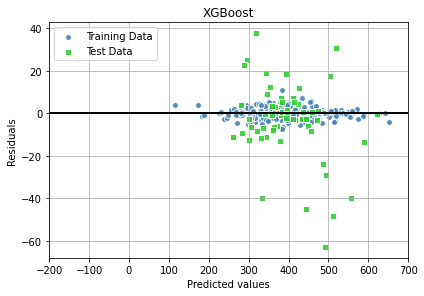

In [18]:
plt.scatter(y_train_pred2,
            y_train_pred2 - y_train,
            c= 'steelblue',
            edgecolor = 'white',
            marker = 'o',
            s = 35,
            alpha = 0.9,
            label = 'Training Data')

plt.scatter(y_test_pred2,
            y_test_pred2 - y_test,
            c = 'limegreen',
            edgecolor = 'white',
            marker = 's',
            s=35,
            alpha = 0.9,
            label = 'Test Data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-200,xmax=700,lw=2,color='black')
plt.xlim([-200,700])
plt.tight_layout()
plt.grid()
plt.title('XGBoost')
plt.show()

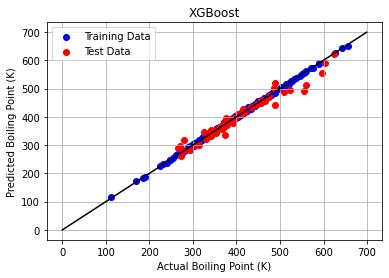

In [19]:
plt.scatter(y_train,y_train_pred2,color='blue',label='Training Data')
plt.scatter(y_test,y_test_pred2,color='red',label='Test Data')
plt.xlabel('Actual Boiling Point (K)')
plt.ylabel('Predicted Boiling Point (K)')
plt.legend(loc='upper left')
plt.grid()
plt.title('XGBoost')
plt.plot(range(700), range(700),'k')

In [27]:


res_test = y_test_pred2 - y_test
res_test = res_test.tolist()
y_test_copy = y_test.copy().tolist()

list_of_tuples = list(zip(res_test, y_test_copy))

outliers = pd.DataFrame(list_of_tuples,columns=['Residuals','Actual BP'])
outliers

,Residuals,Actual BP
0,-2.090977,382.965
1,-4.627595,342.043
2,-10.325298,436.589
3,-12.240295,603.138
4,-21.647699,313.337
...,...,...
58,2.436635,447.270
59,-11.063883,474.184
60,13.391811,341.577
61,-12.542726,370.142


In [20]:
from joblib import dump, load
dump(grid2, 'XGBmod.joblib') 
# mod2 = load('XGBmod.joblib') 

['XGBmod.joblib']